<a href="https://colab.research.google.com/github/sandroormeno/Workshop-Classification_TF_2.X/blob/master/Lecture_01b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Colab Notebooks/workshop_tensorFlow"

/content/drive/My Drive/Colab Notebooks/workshop_tensorFlow


In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [4]:
from PIL import Image
import numpy as np
import os
from random import shuffle
from keras.preprocessing import image
import matplotlib.pyplot as plt
import progressbar
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

In [7]:
count = 0
for folders in os.listdir(TRAIN_DIR):
  path = os.path.join(TRAIN_DIR, folders)
  # print(path)
  for files in os.listdir(path):
    count += 1
    # print(files)
print(count)

724


In [8]:
def get_size_statistics(dir):
    heights = []
    widths = []
    img_count = 0
    for folders in os.listdir(dir):
      path = os.path.join(dir, folders)
      for files in os.listdir(path):
        data = os.path.join(path, files) 
        img_count += 1        
        data = np.array(Image.open(data))
        heights.append(data.shape[0])
        widths.append(data.shape[1])   

    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print()
    print("Average Height: " + str(avg_height))
    print("Average Width: " + str(avg_width))
    print("Total data counted: " + str(img_count))

get_size_statistics(TRAIN_DIR)


Average Height: 189.27348066298342
Average Width: 269.6878453038674
Total data counted: 724


In [0]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'causa_rellena': return np.array([1, 0, 0])
    elif word_label == 'ceviche' : return np.array([0, 1, 0])
    elif word_label == 'pollo_a_la_brasa' : return np.array([0, 0, 1])

In [0]:
IMG_SIZE = 224

In [0]:
def load_data(dir, total):
  progressbar.streams.flush()
  bar = progressbar.ProgressBar(max_value=total)
  train_data = []
  c = 0
  for folders in os.listdir(dir):   
    path = os.path.join(dir, folders)
    for files in os.listdir(path):
      label = label_img(folders)
      data = os.path.join(path, files)               
      img = Image.open(data)
      img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
      img = image.img_to_array(img)
      #img = img/255 #normalizatiuon
      train_data.append([img, label]) 
      bar.update(c) 
      c += 1         
    shuffle(train_data)
  return train_data

In [13]:
train_data = load_data(TRAIN_DIR, count)

 98% (715 of 724) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

In [14]:
print("Shape: "+ str(train_data[723][0].shape))
print("label: "+ str(train_data[723][1]))

Shape: (224, 224, 3)
label: [0 1 0]


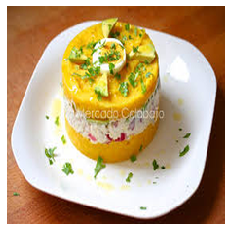

[1 0 0]


In [23]:
num= 567
plt.imshow(train_data[num][0]/255)
plt.axis('off')
plt.show()
print(train_data[num][1])